In [1]:
import utils

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [2]:
train_data, train_results, test_data, test_results = utils.read_data()

In [26]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(train_data, train_results, test_data, enable_delta=False, **est_parameters):
    est = RandomForestRegressor(n_jobs=-1, **est_parameters)
    
    if enable_delta:
        est.fit(to_model_with_features(train_data), to_model(make_delta(train_data, train_results))) 
        delta_prediction = from_model(est.predict(to_model_with_features(test_data)))
        prediction = unmake_delta(test_data, delta_prediction)
    else:
        est.fit(to_model_with_features(train_data), to_model(train_results))
        prediction = from_model(est.predict(to_model_with_features(test_data)))
        
    return prediction

1/4: 2016-12-02 10:31:32
2/4: 2016-12-02 10:31:43
3/4: 2016-12-02 10:32:19
4/4: 2016-12-02 10:33:38
done! 2016-12-02 10:36:12
Results: [0.19751456791119515, 0.3524603396876469, 0.38751033176339544, 0.40017013894868581]


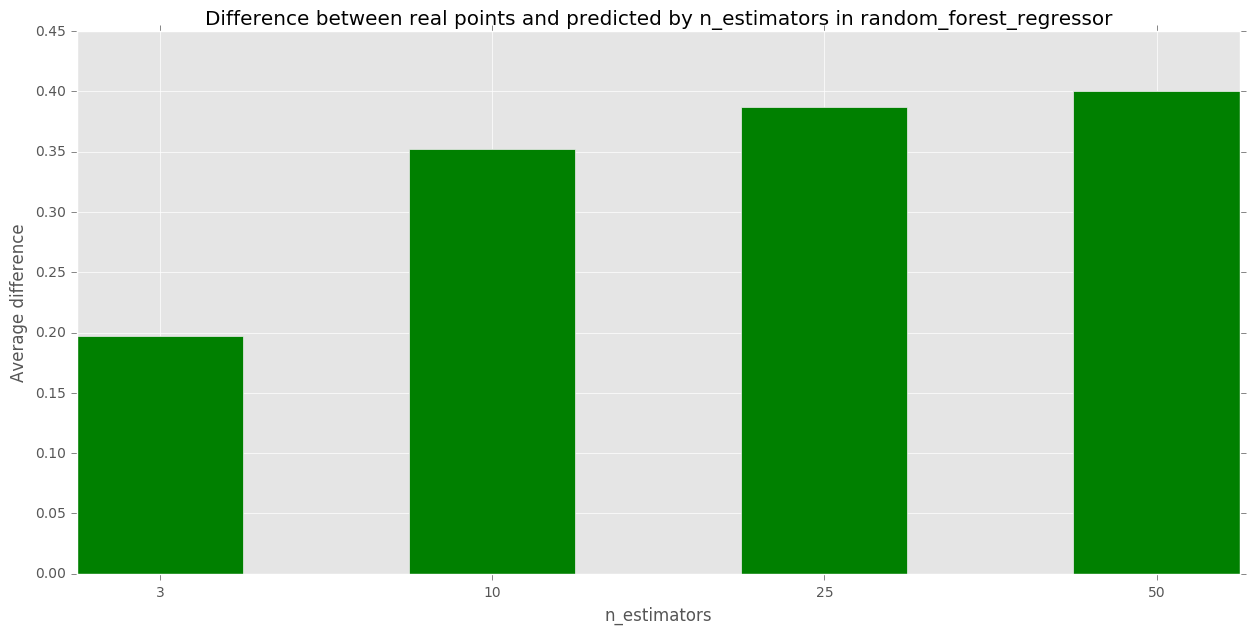

In [27]:
compare_results(function=random_forest_regressor, test_results=test_results, parameter_name="n_estimators",
                list_of_values=[3, 10, 25, 50], train_data=train_data, train_results=train_results,
                test_data=test_data, enable_delta=True)

1/4: 2016-12-02 10:36:13
2/4: 2016-12-02 10:36:25
3/4: 2016-12-02 10:36:58
4/4: 2016-12-02 10:38:19
done! 2016-12-02 10:40:55
Results: [0.80147187822522947, 0.88741175133458228, 0.9093528277870816, 0.91685039070975494]


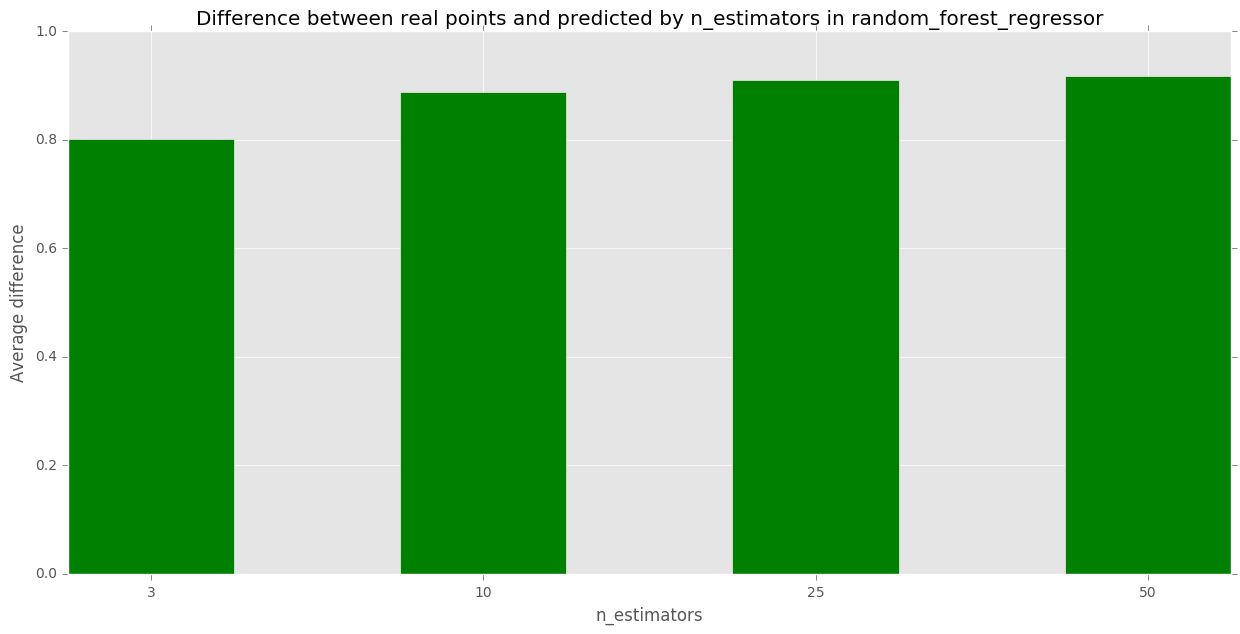

In [28]:
compare_results(function=random_forest_regressor, test_results=train_results, parameter_name="n_estimators",
                list_of_values=[3, 10, 25, 50], train_data=train_data, train_results=train_results,
                test_data=train_data, enable_delta=True)